In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression




In [41]:


data = pd.read_csv(r"C:\Users\20106\Desktop\datasetsandcodefilesstockmarketprediction_2\Google_train_data.csv")


In [42]:
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [44]:
import pandas as pd

# Assuming data is already loaded
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data = data.dropna()
trainData = data.iloc[:, 4:5].values


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
trainData = scaler.fit_transform(trainData)


In [47]:
X_train=[]
y_train=[]

for i in range(60,1149):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
    
X_train,y_train=np.array(X_train),np.array(y_train)    

In [48]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [49]:
!pip install tensorflow

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense




In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input
import matplotlib.pyplot as plt

model = Sequential()

model.add(Input(shape=(X_train.shape[1], 1)))  # This is the correction

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))


In [52]:
model.compile(optimizer='adam', loss='mean_squared_error')
hist = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)


Epoch 1/20
35/35 - 13s - 361ms/step - loss: 0.0358
Epoch 2/20
35/35 - 4s - 125ms/step - loss: 0.0098
Epoch 3/20
35/35 - 5s - 144ms/step - loss: 0.0100
Epoch 4/20
35/35 - 5s - 129ms/step - loss: 0.0098
Epoch 5/20
35/35 - 5s - 129ms/step - loss: 0.0076
Epoch 6/20
35/35 - 4s - 127ms/step - loss: 0.0070
Epoch 7/20
35/35 - 5s - 134ms/step - loss: 0.0063
Epoch 8/20
35/35 - 4s - 119ms/step - loss: 0.0069
Epoch 9/20
35/35 - 4s - 126ms/step - loss: 0.0063
Epoch 10/20
35/35 - 5s - 133ms/step - loss: 0.0062
Epoch 11/20
35/35 - 5s - 131ms/step - loss: 0.0071
Epoch 12/20
35/35 - 4s - 124ms/step - loss: 0.0099
Epoch 13/20
35/35 - 4s - 127ms/step - loss: 0.0074
Epoch 14/20
35/35 - 4s - 121ms/step - loss: 0.0055
Epoch 15/20
35/35 - 4s - 125ms/step - loss: 0.0052
Epoch 16/20
35/35 - 5s - 129ms/step - loss: 0.0052
Epoch 17/20
35/35 - 4s - 122ms/step - loss: 0.0052
Epoch 18/20
35/35 - 4s - 124ms/step - loss: 0.0060
Epoch 19/20
35/35 - 4s - 117ms/step - loss: 0.0049
Epoch 20/20
35/35 - 4s - 124ms/step - l

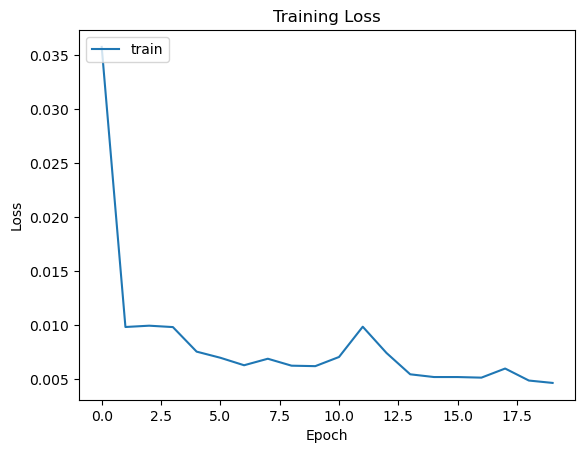

In [53]:
# Plot training loss
plt.plot(hist.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.legend(['train'],loc='upper left')
plt.show()

In [83]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the test data
testData = pd.read_csv("C:\\Users\\20106\\Desktop\\datasetsandcodefilesstockmarketprediction_3\\Google_test_data.csv")
testData['Close'] = pd.to_numeric(testData.Close, errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:, 4:5]

# Extract y_test
y_test = testData.iloc[60:, 0:].values

# Scale the input data
# sc = MinMaxScaler(feature_range=(0, 1))
inputClosing = testData.iloc[:, 0:].values
inputClosing_scaled = sc.fit_transform(inputClosing)

# Prepare X_test
X_test = []
length = len(testData)
timestep = 60

for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i-timestep:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape


(192, 60, 1)

In [84]:
y_pred=model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [85]:
y_pred

array([[0.26061803],
       [0.2565722 ],
       [0.2608111 ],
       [0.2737921 ],
       [0.29016086],
       [0.30038986],
       [0.29934338],
       [0.28859788],
       [0.27553907],
       [0.26531357],
       [0.2537677 ],
       [0.23890547],
       [0.22306134],
       [0.20699427],
       [0.19516565],
       [0.18965818],
       [0.19646096],
       [0.21739471],
       [0.2502152 ],
       [0.2912761 ],
       [0.32574573],
       [0.3468492 ],
       [0.348942  ],
       [0.33372927],
       [0.30913717],
       [0.28470233],
       [0.26621574],
       [0.25270736],
       [0.23840234],
       [0.22222456],
       [0.20464204],
       [0.18525462],
       [0.16070326],
       [0.13033488],
       [0.10500726],
       [0.09334432],
       [0.09689815],
       [0.11223122],
       [0.13534628],
       [0.15736458],
       [0.17996156],
       [0.20466658],
       [0.23198941],
       [0.26002052],
       [0.2851843 ],
       [0.30258608],
       [0.3082077 ],
       [0.307

In [86]:
predicted_price = sc.inverse_transform(y_pred)


In [87]:
predicted_price

array([[1057.366  ],
       [1056.1062 ],
       [1057.4261 ],
       [1061.4679 ],
       [1066.5645 ],
       [1069.7494 ],
       [1069.4236 ],
       [1066.0778 ],
       [1062.0118 ],
       [1058.828  ],
       [1055.233  ],
       [1050.6056 ],
       [1045.6724 ],
       [1040.6697 ],
       [1036.9868 ],
       [1035.272  ],
       [1037.3901 ],
       [1043.908  ],
       [1054.127  ],
       [1066.9117 ],
       [1077.6442 ],
       [1084.215  ],
       [1084.8665 ],
       [1080.1299 ],
       [1072.4729 ],
       [1064.8649 ],
       [1059.1089 ],
       [1054.903  ],
       [1050.4489 ],
       [1045.4119 ],
       [1039.9374 ],
       [1033.9009 ],
       [1026.2566 ],
       [1016.8011 ],
       [1008.91504],
       [1005.2836 ],
       [1006.3902 ],
       [1011.16425],
       [1018.3614 ],
       [1025.2169 ],
       [1032.2528 ],
       [1039.945  ],
       [1048.4523 ],
       [1057.1799 ],
       [1065.0149 ],
       [1070.4332 ],
       [1072.1835 ],
       [1071.

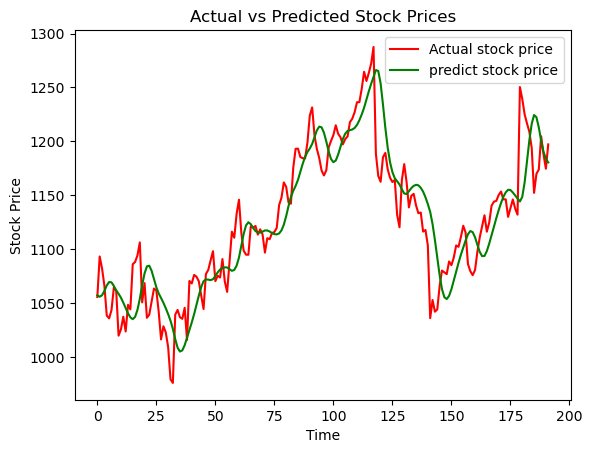

In [88]:
plt.plot(y_test,color='red',label='Actual stock price')
plt.plot(predicted_price,color='green',label='predict stock price')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()